In [ ]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 4.3 MB/s 


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import tensorflow as tf

In [ ]:
from tensorflow import keras
import tensorflow_addons as tfa

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('drive/MyDrive/dataset')

sentiment_types = os.listdir('drive/MyDrive/dataset')

print(sentiment_types)

['Negative', 'Neutral', 'Positive']


In [ ]:
sentiments = []

for item in sentiment_types:
  all_sentiments = os.listdir('drive/MyDrive/dataset'+'/'+item)

  for sentiment in all_sentiments:
    sentiments.append((item,str('drive/MyDrive/dataset'+'/'+item)+'/'+sentiment))
    print(sentiments)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
sentiments_df = pd.DataFrame(data = sentiments,columns=['sentiment type','image'])
print(sentiments_df.head())
print("Total number of sentiments",len(sentiments_df))

sentiment_count = sentiments_df['sentiment type'].value_counts()

print("sentiments in each catagory")
print(sentiment_count)

  sentiment type                                              image
0       Negative  drive/MyDrive/dataset/Negative/69066454-4d14-4...
1       Negative  drive/MyDrive/dataset/Negative/690a97e6-327d-4...
2       Negative  drive/MyDrive/dataset/Negative/688a1983-3c5f-4...
3       Negative  drive/MyDrive/dataset/Negative/693c37e0-15bc-4...
4       Negative  drive/MyDrive/dataset/Negative/696448cc-ceee-4...
Total number of sentiments 2432
sentiments in each catagory
Negative    1695
Positive     648
Neutral       89
Name: sentiment type, dtype: int64


In [ ]:
import cv2 as cv
from matplotlib.pyplot import imshow
path = "drive/MyDrive/dataset/"
c = {
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2,
}
im_size = 128

images = []
labels = []

for i in sentiment_types:
  dataset_path=path+str(i)
  filenames = [i for i in os.listdir(dataset_path)]
  for f in filenames:
    img = cv.imread(dataset_path+'/'+f)
    img = cv.resize(img,(im_size,im_size))
    #img = cv.Canny(img,100,200)
    #imshow(img)
    #img = preprocess_input(img)
    #imshow(img)
    images.append(img)
    labels.append(i)
images = np.array(images)
labels = np.array(labels)
images = images/255.0
images.shape

(2432, 128, 128, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
y = sentiments_df['sentiment type'].values

y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
print(y)

[0 0 0 ... 2 2 2]


In [ ]:
count_0=0
count_1=0
count_2=0
for i in y:
  if(i == 0):
    count_0 +=1
  elif(i == 1):
    count_1+=1
  elif(i == 2):
    count_2+=1

print(count_0)
print(count_1)
print(count_2)

1695
89
648


In [ ]:
'''y=y.reshape(-1,1)
onehotencoder = OneHotEncoder(sparse=False)
Y = onehotencoder.fit_transform(y)
Y.shape'''

'y=y.reshape(-1,1)\nonehotencoder = OneHotEncoder(sparse=False)\nY = onehotencoder.fit_transform(y)\nY.shape'

In [ ]:
#training_set.class_indices

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
images = images.reshape(images.shape[0],3*im_size*im_size)
ros = SMOTE(random_state = 50,sampling_strategy='not majority',k_neighbors=3)
#ros = RandomOverSampler(s)
images,Y = ros.fit_resample(images,y)
print(images.shape)
print(Y.shape)
print(images.shape[0])
images = images.reshape(images.shape[0],im_size,im_size,3)

(5085, 49152)
(5085,)
5085


In [ ]:
#images = images.reshape(5085,224,224,3)

In [ ]:
num_classes = 3
input_shape = (128,128,3)

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
#images,Y = shuffle(images,Y,random_state=5)

x_train,x_test,y_train,y_test = train_test_split(images,Y,test_size=0.1, random_state=50)
#sm = SMOTE('minority')
#train_x,train_y = mdo.fit_transform(np.copy(train_x), np.copy(train_y))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4576, 128, 128, 3)
(4576,)
(509, 128, 128, 3)
(509,)


In [ ]:
np.save("/content/drive/MyDrive/test_x",x_test)
np.save("/content/drive/MyDrive/test_y",y_test)

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
num_epochs = 10
image_size = 224  # We'll resize input images to this size
patch_size = 16  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 8
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 224 X 224
Patch size: 16 X 16
Patches per image: 196
Elements per patch: 768


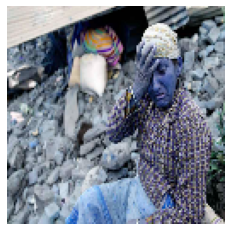

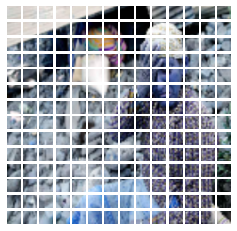

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image)
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy())
    plt.axis("off")

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/10
129/129 [==============================] - 58s 362ms/step - loss: 2.5364 - accuracy: 0.4111 - top-5-accuracy: 1.0000 - val_loss: 0.9541 - val_accuracy: 0.4869 - val_top-5-accuracy: 1.0000
Epoch 2/10
129/129 [==============================] - 45s 349ms/step - loss: 1.0394 - accuracy: 0.4961 - top-5-accuracy: 1.0000 - val_loss: 0.7779 - val_accuracy: 0.6288 - val_top-5-accuracy: 1.0000
Epoch 3/10
129/129 [==============================] - 45s 349ms/step - loss: 0.8979 - accuracy: 0.5546 - top-5-accuracy: 1.0000 - val_loss: 0.6994 - val_accuracy: 0.6528 - val_top-5-accuracy: 1.0000
Epoch 4/10
129/129 [==============================] - 45s 349ms/step - loss: 0.8050 - accuracy: 0.6076 - top-5-accuracy: 1.0000 - val_loss: 0.6040 - val_accuracy: 0.7009 - val_top-5-accuracy: 1.0000
Epoch 5/10
129/129 [==============================] - 45s 349ms/step - loss: 0.7348 - accuracy: 0.6489 - top-5-accuracy: 1.0000 - val_loss: 0.5809 - val_accuracy: 0.7031 - val_top-5-accuracy: 1.0000
Epoch

In [ ]:
vit_classifier.save("new")

INFO:tensorflow:Assets written to: new/assets


INFO:tensorflow:Assets written to: new/assets


AttributeError: ignored

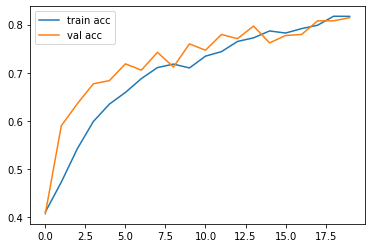

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()

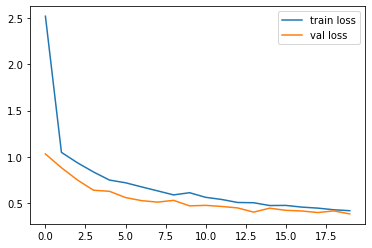

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [ ]:
vit_classifier.evaluate(x_test,y_test,batch_size=batch_size)

16/16 [==============================] - 2s 115ms/step - loss: 0.3877 - accuracy: 0.8035 - top-5-accuracy: 1.0000


[0.38772597908973694, 0.8035363554954529, 1.0]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
y_pred=vit_classifier.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74       209
           1       0.99      0.99      0.99       179
           2       0.57      0.76      0.65       121

    accuracy                           0.80       509
   macro avg       0.80      0.81      0.79       509
weighted avg       0.82      0.80      0.81       509

[[139   2  68]
 [  0 178   1]
 [ 29   0  92]]


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_pred,y_test,average='weighted')

0.8066232686802379

In [ ]:
!zip -r /content/vit_with_sampled_78_percent.zip /content/new

In [ ]:
import tensorflow as tf
from tensorflow_addons.optimizers import AdamW

In [ ]:
vit = tf.keras.models.load_model('drive/MyDrive/vit_sampled_78',custom_objects = {'AdamW' : AdamW})

In [ ]:
vit.evaluate(x_test,y_test)

16/16 [==============================] - 7s 114ms/step - loss: 0.4175 - accuracy: 0.7859 - top-5-accuracy: 1.0000


[0.41752928495407104, 0.7858546376228333, 1.0]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
y_pred=vit.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       187
           1       0.99      0.96      0.98       186
           2       0.60      0.71      0.65       136

    accuracy                           0.79       509
   macro avg       0.78      0.78      0.78       509
weighted avg       0.80      0.79      0.79       509

[[124   1  62]
 [  5 179   2]
 [ 39   0  97]]
